### Babies per woman vs Children mortality.

<br>

#### General setup.
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Load the data set.
___

In [3]:
gapminder = pd.read_csv('../Data/gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [4]:
gapminder.tail()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
14735,Zimbabwe,2011,Africa,14255592.0,51.6,90.80,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.2,91.33,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.7,91.67,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.0,91.90,3.41,1773.0,4.854209
14739,Zimbabwe,2015,Africa,15602751.0,59.3,92.04,3.35,1801.0,4.930869


In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
# Select every 20th row up to 200
gapminder.loc[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


<br>

#### Univariate Data Visualization
___

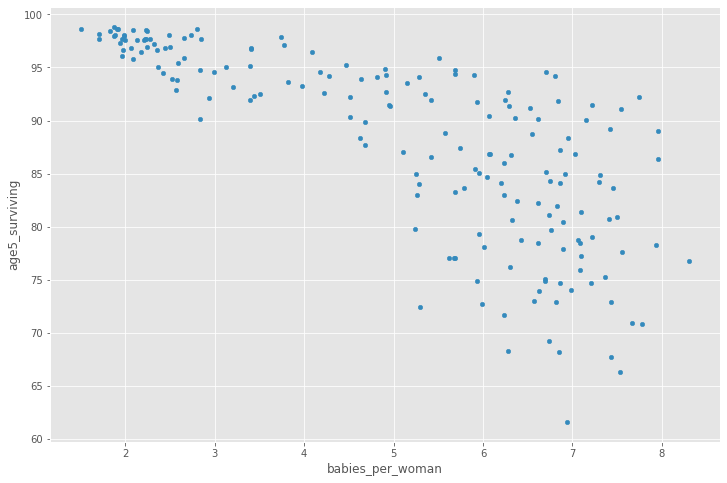

In [7]:
# Plot the number of children vs Surviving under age 5 for the year 1973
gapminder[gapminder.year == 1973].plot.scatter('babies_per_woman', 'age5_surviving');

The plot above shows that women had more children when they had less chances of surviving. 

In [8]:
def plot_year(year):
    """ Add sizing and colour to the plot """
    # Data per year
    data = gapminder[gapminder.year == year]
    
    # Size the points per area population (scaled)
    area = 5e-6 * data.population
    
    # Create a colour map per region
    colours = data.region.map({'Africa': 'skyblue', 'Europe': 'darkgreen', 
                               'Asia': 'coral', 'America': 'gold'})
    # Plot the data
    data.plot.scatter('babies_per_woman', 'age5_surviving', 
                      s=area, c=colours, edgecolor='k', linewidth=1)
    
    # Limit the axis and change labels
    plt.axis(xmin=0, xmax=10, ymin=50, ymax=105)
    plt.xlabel('Babies per woman')
    plt.ylabel('% children alive at age 5')

In [9]:
# Create an interactive plot using jupyter widgets
interact(plot_year, year=widgets.IntSlider(min=1950, max=2015, step=1, value=1973));

interactive(children=(IntSlider(value=1973, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<br>

#### Two Variable Data Visualization
____

1. Russia

In [10]:
russia = gapminder.query('country == "Russia"')
russia

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
10852,Russia,1800,Europe,31088398.0,29.57,58.126,7.00,1430.0,3.915127
10853,Russia,1810,Europe,31088398.0,29.57,58.126,7.00,1447.0,3.961670
10854,Russia,1820,Europe,31861526.0,29.57,58.126,7.00,1464.0,4.008214
10855,Russia,1830,Europe,34134430.0,29.57,58.126,7.00,1562.0,4.276523
10856,Russia,1840,Europe,37420913.0,29.57,58.126,7.00,1666.0,4.561259
...,...,...,...,...,...,...,...,...,...
10928,Russia,2011,Europe,143211476.0,69.80,98.860,1.58,22570.0,61.793292
10929,Russia,2012,Europe,143287536.0,70.40,98.920,1.59,23299.0,63.789185
10930,Russia,2013,Europe,143367341.0,70.80,98.960,1.60,23561.0,64.506502
10931,Russia,2014,Europe,143429435.0,70.90,99.010,1.60,23293.0,63.772758


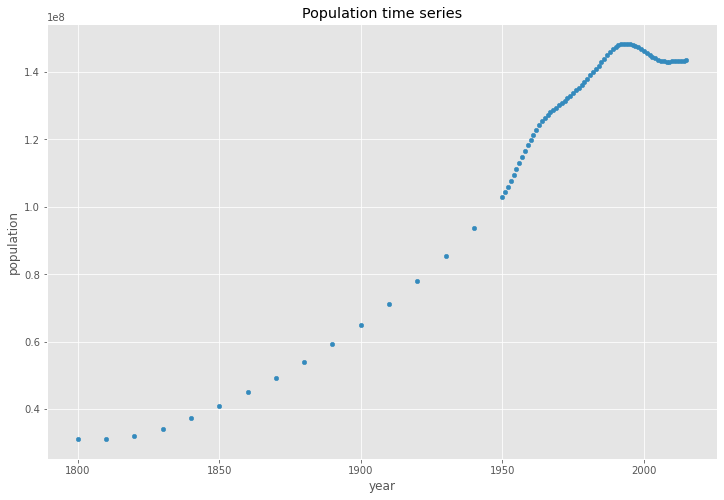

In [11]:
russia.plot.scatter('year', 'population')
plt.title('Population time series');

The above plot depicts a decrease in the population around 1985-1990 which stabilized after 2005. 

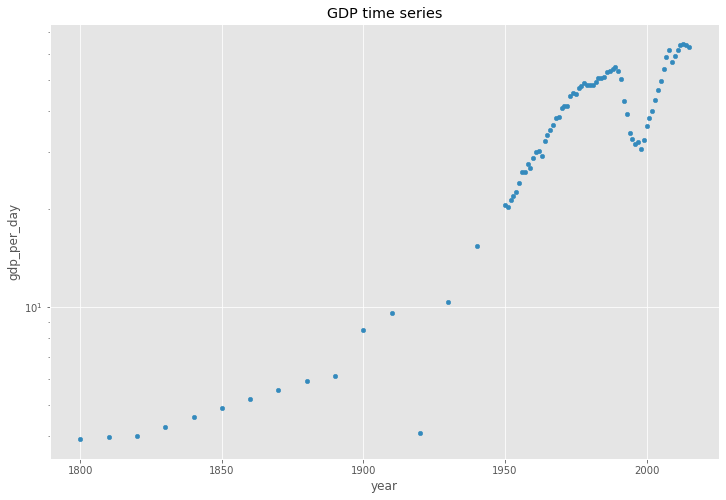

In [12]:
russia.plot.scatter('year', 'gdp_per_day', logy=True)
plt.title('GDP time series');

We can see a sudden fall in GDP in Russia from 1985 (which corresponds with the decrease in population growth).

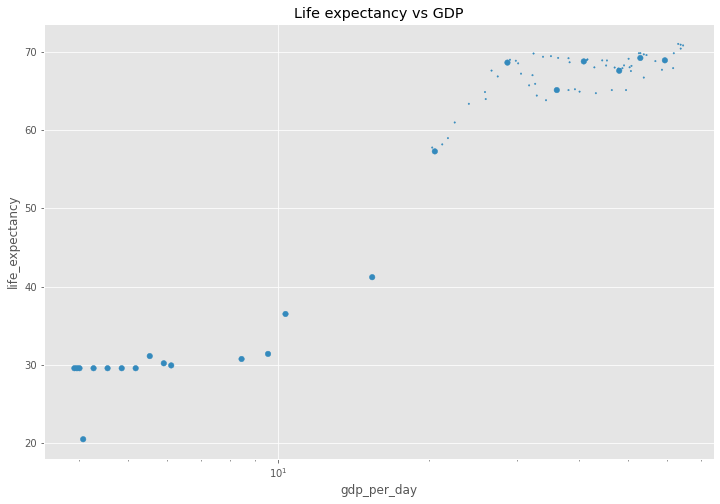

In [13]:
# Mark decades by changing the size of the dots.
size = np.where(russia.year % 10 == 0, 30, 2)
russia.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size)
plt.title('Life expectancy vs GDP');

<br>

2. Japan vs Russa

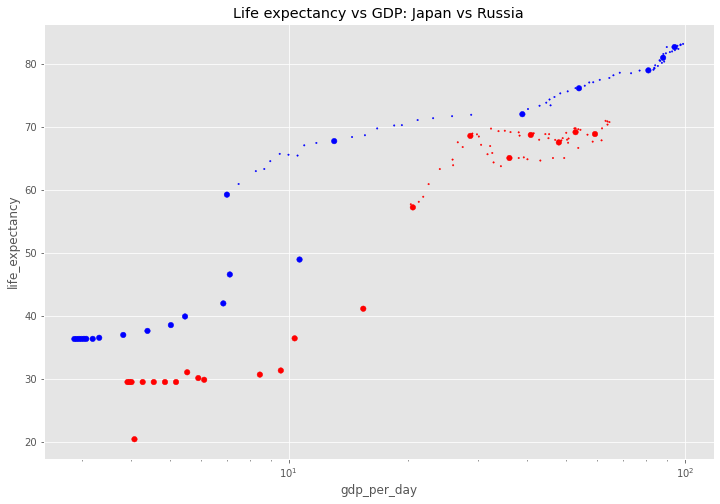

In [14]:
japan_vs_russia = gapminder.query('country == "Japan" or country == "Russia"')

size = np.where(japan_vs_russia.year % 10 == 0, 30, 2)
colour = np.where(japan_vs_russia.country == 'Russia', 'r', 'b')

japan_vs_russia.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size, c=colour)
plt.title('Life expectancy vs GDP: Japan vs Russia');

The progress on both countries are similar. However, Japan is consistently richer and healthier.

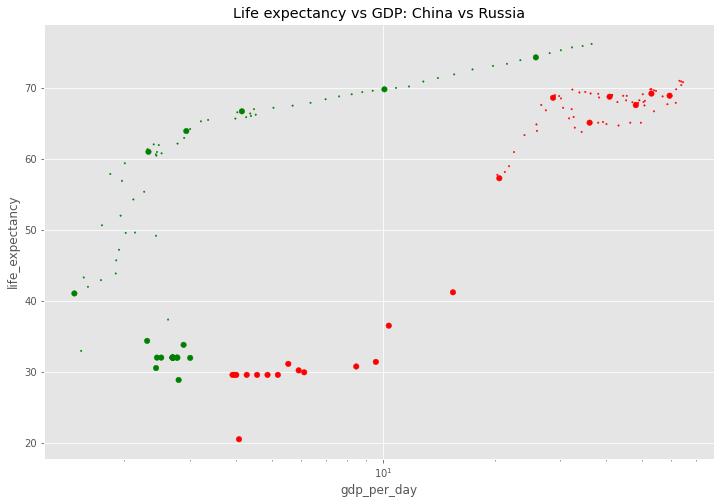

In [15]:
china_vs_russia = gapminder.query('country == "China" or country == "Russia"')

size = np.where(china_vs_russia.year % 10 == 0, 30, 2)
colour = np.where(china_vs_russia.country == 'Russia', 'r', 'g')

china_vs_russia.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size, c=colour)
plt.title('Life expectancy vs GDP: China vs Russia');

To understand the cluster of points in the left of the plot we can connect the scatter dots by adding a line plot on it. 

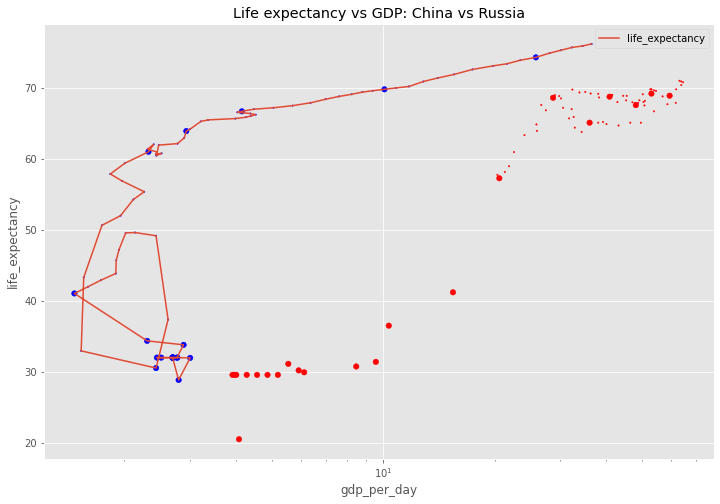

In [16]:
china_vs_russia = gapminder.query('country == "China" or country == "Russia"')

size = np.where(china_vs_russia.year % 10 == 0, 30, 2)
colour = np.where(china_vs_russia.country == 'Russia', 'r', 'b')

ax = china_vs_russia.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size, c=colour)
plt.title('Life expectancy vs GDP: China vs Russia')

china_vs_russia[china_vs_russia.country == 'China'].plot.line('gdp_per_day', 'life_expectancy', ax=ax);

A sudden decrease in life expectancy in China here could be connected to the Great Leap famine in 1959-1961 which led to millions of people dying.

<br>

#### Multiple variables.
___


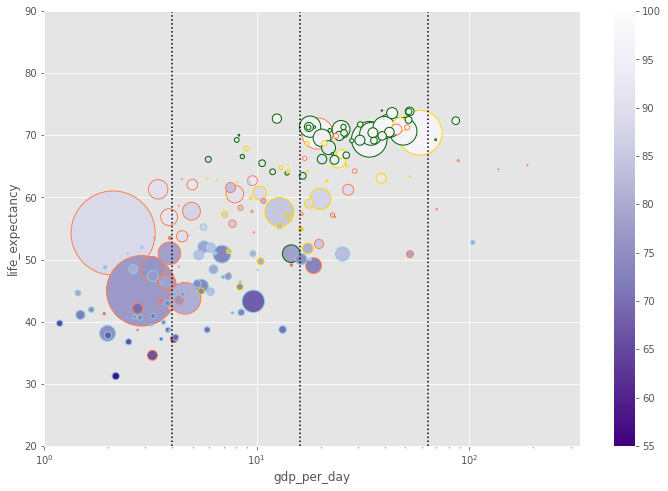

In [17]:
def plotyear(year):
    # Select data and sort its values in desc order so the smaller values appear on the plot
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    
    # Visual aspects of the plot
    # Scale the population and apply to the size of the scatter plot
    area = 1e-5 * data.population 
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'darkgreen', 
                               'Asia': 'coral', 'America': 'gold'})
    
    # Plot the data
    data.plot.scatter('gdp_per_day', 'life_expectancy', 
                      logx=True, s=area,
                      c=color, colormap=cm.get_cmap('Purples_r'),
                      vmin=55, vmax=100,
                      sharex=False, figsize=(12, 8),
                     linewidth=1, edgecolor=edgecolor)
    # Earning levels
    for level in [4,16,64]:
        plt.axvline(level, linestyle=':', c='k')
        
    plt.axis(xmin=1, xmax = 330, ymin = 20, ymax=90)
    
plotyear(1965);

In [18]:
# Add year selector to the plot
interact(plotyear, year = range(1965,2016,10));

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

Here we can see that 1965 a large number of people lived in poverty earning less than 4 dollars. In 2015, however, the situation has changed and the majority of countries have moved from poverty line. 

In [19]:
# Calculate population per region in 2015
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

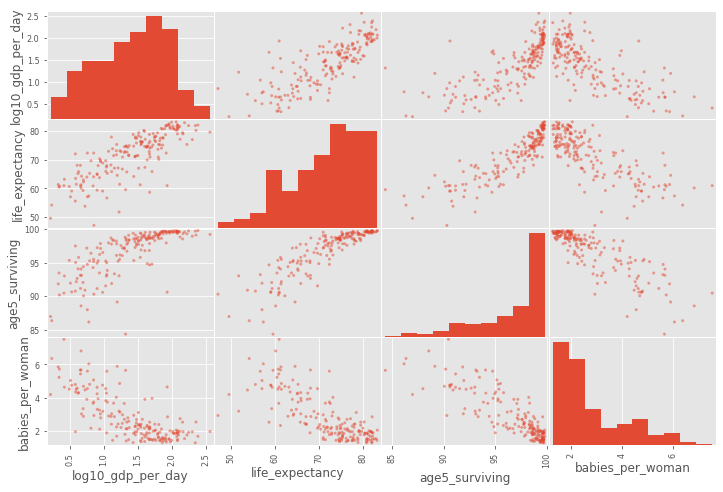

In [20]:
# A different way of looking at multivariable plotting with pandas matrix
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015, ['log10_gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]
pd.plotting.scatter_matrix(data);

<br>

___
#### End.